# Lab5

Ознайомитися з методами регресійного аналізу, навчитися працювати з реальними і штучно створеними наборами даних для класифікації, застосовувати моделі для класифікації даних та аналізувати результати.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00        23

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164



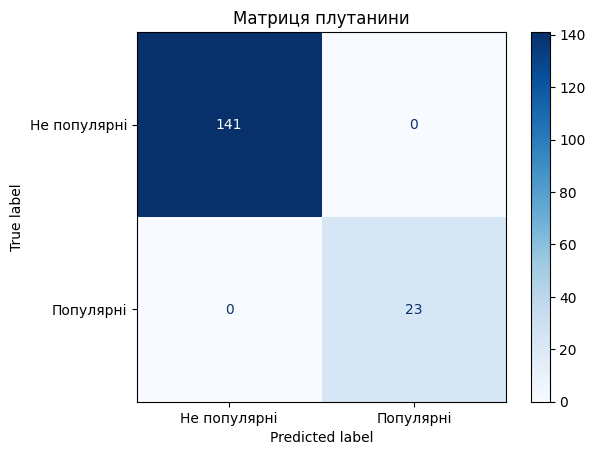

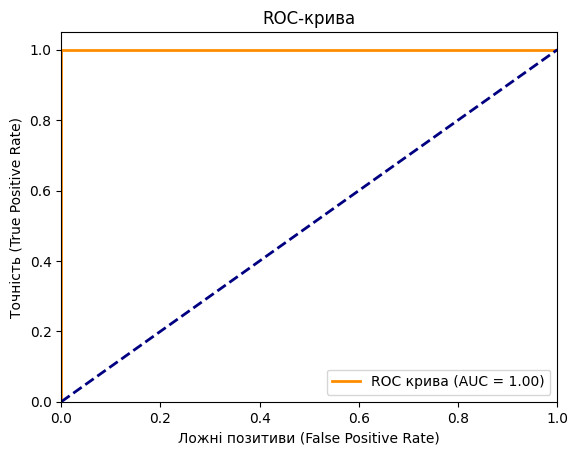

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('Spotify_Most_Streamed_Songs.csv')

# Перетворення стовпця 'streams' у числовий формат
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Додавання цільової змінної 'is_popular' (1 для популярних треків, 0 для інших)
popularity_threshold = 1_000_000_000  # Наприклад, 1 мільярд стрімів
data['is_popular'] = (data['streams'] > popularity_threshold).astype(int)

# Попередня обробка даних
# (1) Обробка пропущених значень
data = data.dropna()

# (2) Масштабування числових значень
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# (3) Кодування категоріальних змінних
encoder = LabelEncoder()
categorical_features = data.select_dtypes(include=['object']).columns
for column in categorical_features:
    data[column] = encoder.fit_transform(data[column])

# Розподіл даних на навчальну та тестову вибірки
X = data.drop('is_popular', axis=1)
y = data['is_popular']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчання моделі
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Оцінка моделі
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

# Матриця плутанини
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Не популярні', 'Популярні'])
disp.plot(cmap='Blues')
plt.title('Матриця плутанини')
plt.show()

# ROC-крива
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC крива (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложні позитиви (False Positive Rate)')
plt.ylabel('Точність (True Positive Rate)')
plt.title('ROC-крива')
plt.legend(loc='lower right')
plt.show()
